In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
def get_good_slices(arr, s_indx=0):
    slices = []
    for i in range(s_indx, len(arr)):
        if arr[i].max() >= 1:
            slices.append(i)
            # classes = set(arr[i].flatten().tolist())
            # if len(classes) > 2:
            #     print('Found slice with more than 2 classes', i)
            #     print(classes)
    return slices

In [21]:
from utils.utils import get_good_slices_from_path

seg_paths, vol_paths = get_good_slices_from_path('/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task09_Spleen/labelsTr',
                                                 '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task09_Spleen/imagesTr')

In [24]:
save_to_pickle(seg_paths, '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task09_Spleen/labelsTr_slices.pkl')
save_to_pickle(vol_paths, '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task09_Spleen/imagesTr_slices.pkl')

In [ ]:
import pickle
path = '/disk4/Lev/Projects/diffusion_finetuning/data/lits17/train/lits_train_seg_files_tumor_slices.pickle'
with open(path, 'rb') as handle:
            loaded_dict = pickle.load(handle)

print(loaded_dict.keys())
        

In [2]:
print(lungs_good_seg_slices[seg_patient_path])
slice_n = 120

seg_img = sitk.ReadImage(seg_patient_path, sitk.sitkUInt8)
seg_img = sitk.GetArrayFromImage(seg_img)
seg_img = seg_img[slice_n]
        
img = sitk.ReadImage(patient_path, sitk.sitkUInt8)
img = sitk.GetArrayFromImage(img)
img= img[slice_n]
# lungs_seg_good_slice = lungs_good_seg_slices[seg_patient_path][:,:,slice_n]
# lungs_vol_good_slice = lungs_good_vol_slices[patient_path][:,:,slice_n]
display_seg_vol_slice(img, seg_img)


NameError: name 'lungs_good_seg_slices' is not defined

In [65]:
import random
# get good slice for lungs and heart
lung_seg_folder = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task06_Lung/labelsTr'
lung_vol_folder = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task06_Lung/imagesTr'

lungs_good_seg_slices, lungs_good_vol_slices = get_good_slices_from_path(lung_seg_folder, lung_vol_folder)
save_to_pickle(lungs_good_seg_slices, '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task06_Lung/lungs_good_seg_slices.pickle')
save_to_pickle(lungs_good_vol_slices, '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task06_Lung/lungs_good_vol_slices.pickle')

# save slice for one shot
patient_path = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task06_Lung/imagesTr/lung_043.nii.gz'
seg_patient_path = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task06_Lung/labelsTr/lung_043.nii.gz'
slice_n  = random.choice(lungs_good_seg_slices[seg_patient_path])

one_shot_dict_seg_lungs = {seg_patient_path : [slice_n]}
one_shot_dict_vol_lungs = {patient_path : [slice_n]}
save_to_pickle(one_shot_dict_seg_lungs, '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task06_Lung/imagesFinetune/lungs_seg_good_slice.pickle')
save_to_pickle(one_shot_dict_vol_lungs, '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task06_Lung/imagesFinetune/lungs_vol_good_slice.pickle')

##### HEART #####

heart_seg_folder = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task02_Heart/labelsTr'
heart_vol_folder = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task02_Heart/imagesTr'

heart_good_seg_slices, heart_good_vol_slices = get_good_slices_from_path(heart_seg_folder, heart_vol_folder)
save_to_pickle(heart_good_seg_slices, '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task02_Heart/heart_good_seg_slices.pickle')
save_to_pickle(heart_good_vol_slices, '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task02_Heart/heart_good_vol_slices.pickle')

# one shot
patient_path = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task02_Heart/imagesTr/la_007.nii.gz'
seg_patient_path = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task02_Heart/labelsTr/la_007.nii.gz'
slice_n  = random.choice(heart_good_vol_slices[patient_path])

one_shot_dict_seg_heart = {seg_patient_path : [slice_n]}
one_shot_dict_vol_heart = {patient_path : [slice_n]}
save_to_pickle(one_shot_dict_seg_heart, '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task02_Heart/imagesFinetune/heart_seg_good_slice.pickle')
save_to_pickle(one_shot_dict_vol_heart, '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task02_Heart/imagesFinetune/heart_vol_good_slice.pickle')


In [23]:
# save to pickle
import pickle 
def save_to_pickle(object, path):
    with open(path, 'wb') as handle:
        pickle.dump(object, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
# load from pickle
import pickle
def load_from_pickle(path):
    with open(path, 'rb') as handle:
        loaded_dict = pickle.load(handle)
    return loaded_dict

# seg_slices = load_from_pickle('/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task02_Heart/imagesFinetune/heart_seg_good_slice.pickle')
# vol_slices = load_from_pickle("/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task02_Heart/imagesFinetune/heart_vol_good_slice.pickle")

In [73]:
print(seg_slices)
vol_slices

{'/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task02_Heart/labelsTr/la_007.nii.gz': [108]}


{'/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task02_Heart/imagesTr/la_007.nii.gz': [108]}

In [2]:
import matplotlib.pyplot as plt
# display 2 arrays side by side
def display_seg_vol_slice(seg_slice, vol_slice):
    fig , ax = plt.subplots(1, 2, figsize=(20,20))
    ax[0].imshow(seg_slice, cmap='jet')
    ax[0].axis('off')
    ax[1].imshow(vol_slice, cmap='gray')
    ax[1].axis('off')
    plt.show()

(120, 320, 320)


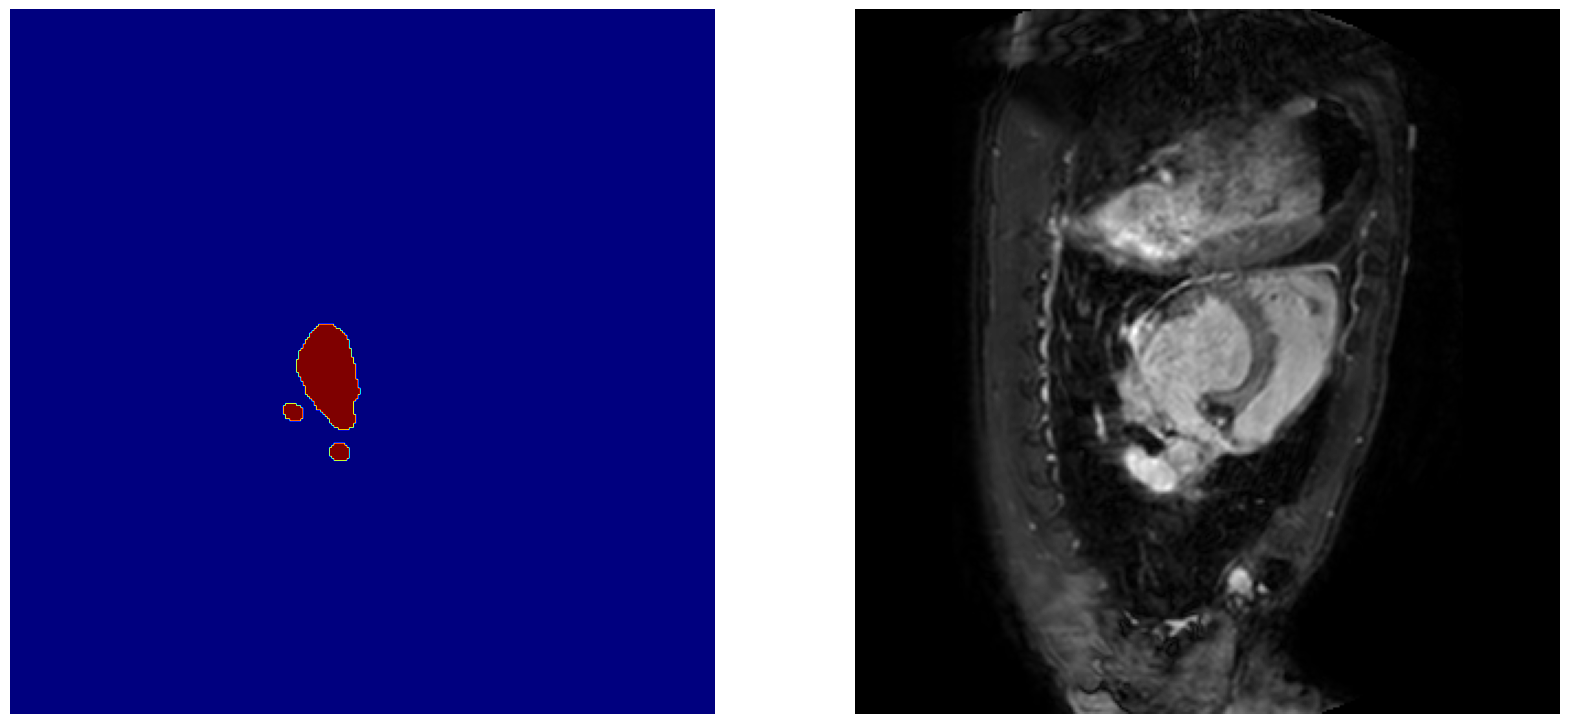

In [20]:
#import sitk
import SimpleITK as sitk

slice_n = 50
seg_patient_path = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task02_Heart/labelsTr/la_011.nii.gz'
patient_path = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task02_Heart/imagesTr/la_011.nii.gz'

seg_img = sitk.ReadImage(seg_patient_path)
seg_img = sitk.GetArrayFromImage(seg_img)
seg_img = seg_img[slice_n]
seg_img = (seg_img * 256).clip(0,255)
        
img = sitk.ReadImage(patient_path)
img = sitk.GetArrayFromImage(img)
print(img.shape)
img= img[slice_n]
# lungs_seg_good_slice = lungs_good_seg_slices[seg_patient_path][:,:,slice_n]
# lungs_vol_good_slice = lungs_good_vol_slices[patient_path][:,:,slice_n]
display_seg_vol_slice(seg_img, img)


## Test Segmentation

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
#@title LOADING MODEL AND MONKEY PATCHING IT
import torch
import numpy as np
from lora_diffusion import monkeypatch_lora, tune_lora_scale
from diffusers2.diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img import StableDiffusionImg2ImgPipeline
from utils.utils import replace_unet_in_pipeline

PATH_PREFIX = '/disk4/Lev/Projects/diffusion_finetuning/output/lits/no_text/one_shot_spleen_run2'
PATH_PREFIX = '/disk4/Lev/Projects/diffusion_finetuning/output/lits/no_text/mse_seg_pred__prev_noisy_segmapt_latent_new_clip_run2'
UNET_WEIGHTS_PATH = os.path.join(PATH_PREFIX, 'unet_seg_weights.pt')
LORA_WEIGHTS_PATH = os.path.join(PATH_PREFIX, 'lora_weight_e1_s18500.pt')
LORA_TEXT_WEIGHTS_PATH = os.path.join(PATH_PREFIX,'lora_weight.text_encoder.pt')

model_id = "stabilityai/stable-diffusion-2-1-base"
torch.cuda.empty_cache()
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to('cuda:3')
# load clip weights
pipe.text_encoder.load_state_dict(
    torch.load('/disk4/Lev/Projects/diffusion_finetuning/training_scripts/clip_text_encoder_weights.pt'))
monkeypatch_lora(pipe.unet, torch.load(LORA_WEIGHTS_PATH))
# monkeypatch_lora(pipe.text_encoder, torch.load(LORA_TEXT_WEIGHTS_PATH), target_replace_module=["CLIPAttention"])

tune_lora_scale(pipe.unet, 1)
# tune_lora_scale(pipe.text_encoder, 1.5)

replace_unet_in_pipeline(pipe, UNET_WEIGHTS_PATH, device=pipe.device)



/opt/miniconda3/envs/lev/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-02-26 18:06:32.754013: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-26 18:06:34.176015: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-26 18:06:34.176056: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries.

#good slices:248


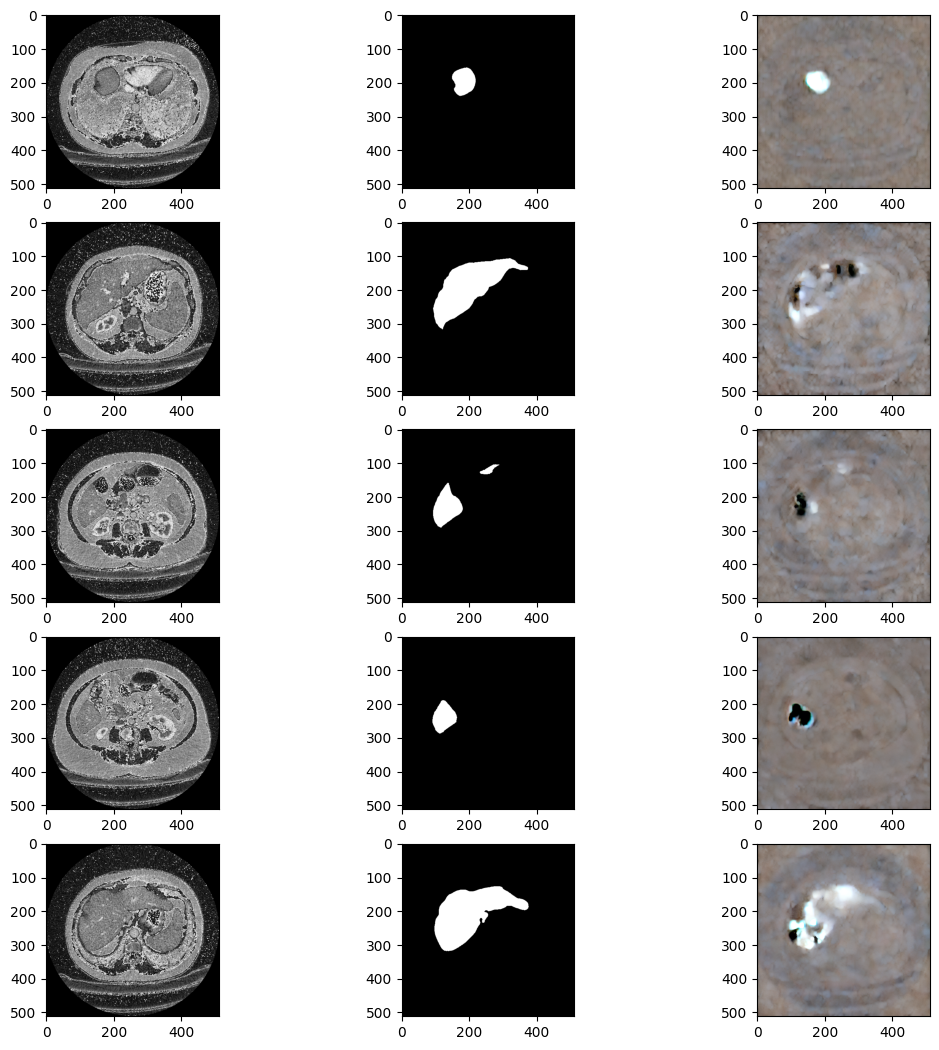

In [4]:
from utils.utils import diffuse_random_medical_images
n = 107 # patient number
PATH = '/disk4/Lev/Projects/diffusion_finetuning/data/lits17/test/'
# lits
lits_seg_path = os.path.join(PATH,f'segmentation-{n}.nii')
lits_path = os.path.join(PATH,f'volume-{n}.nii')

n = 12
PATH = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task09_Spleen/'
msd_seg_path = os.path.join(PATH,f'labelsTr/spleen_{n}.nii.gz')
msd_path = os.path.join(PATH, f'imagesTr/spleen_{n}.nii.gz')

prompt = 'segmentation map of liver'
diffuse_random_medical_images(lits_path, lits_seg_path, pipe, prompt, 0.1, 12)

### Liver Segmentation Results

In [5]:
# reload
%reload_ext autoreload
%autoreload 2

In [3]:
from training_scripts.segmentation_metrics import test_medical_segmentation_metrics
from utils.utils import load_pipe_from_path


In [ ]:
# Pipe loading
from utils.utils import load_pipe_from_path
pipe = load_pipe_from_path('/disk4/Lev/Projects/diffusion_finetuning/output/lits/no_text/mse_lora_rank_6_data_aug_run1',
                           load_clip_weights=True,
                        #    unet_lora_weights_name='lora_weight_e0_s500.pt'
                        original_lora_rank=6
                        )
pipe.to('cuda:3')

dice:0.8757191065402539 iou:0.7789148705048311 precision:0.792093023255814 recall:0.9790873158462091
global_step: 1000,                         mdice: 0.7837318806634818,                         miou: 0.699248162326155,                         mAPmask: 0.6915578905428178
slice:445


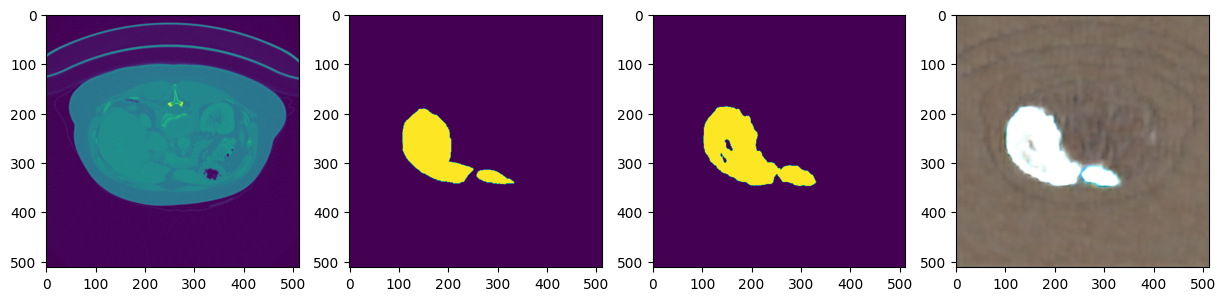

dice:0.8538994356080041 iou:0.7450475657526581 precision:0.7457152458832754 recall:0.9987996999249813
global_step: 1100,                         mdice: 0.782227538435599,                         miou: 0.6974923001741493,                         mAPmask: 0.6897428205808256
slice:365


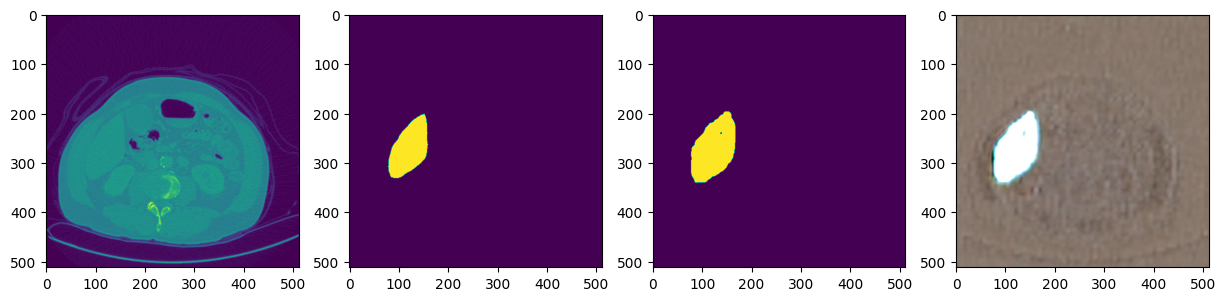

dice:0.5747253298550143 iou:0.403238296374516 precision:0.9987794245858762 recall:0.4034371038174391
global_step: 1200,                         mdice: 0.7800320631459186,                         miou: 0.6947504223351317,                         mAPmask: 0.6869233023433594
slice:233


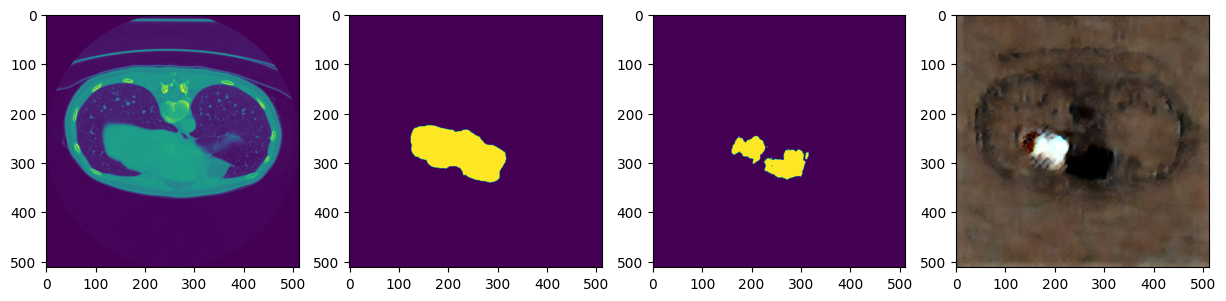

dice:0.8764983796025145 iou:0.7801487453951484 precision:0.7831426179179458 recall:0.9951236811774093
global_step: 1300,                         mdice: 0.7766167583973572,                         miou: 0.691086415273211,                         mAPmask: 0.6830554217167436
slice:382


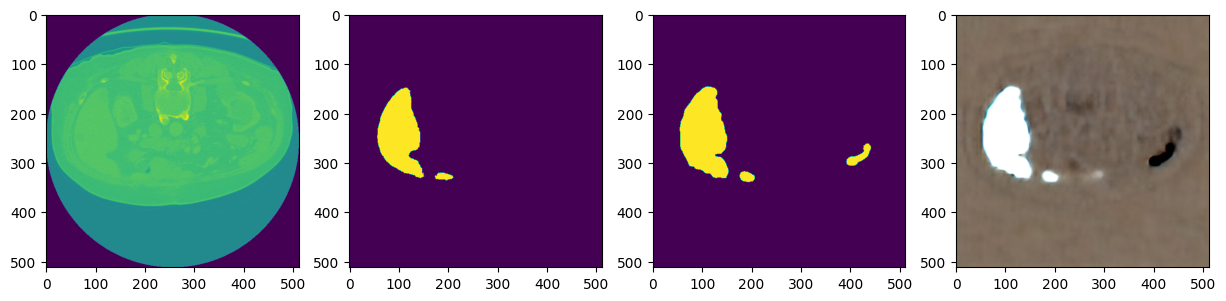

dice:0.8313620983920711 iou:0.711394091572933 precision:0.853336201862495 recall:0.8104912864524039
global_step: 1400,                         mdice: 0.7793345373655559,                         miou: 0.6935243579315968,                         mAPmask: 0.6854102785078688
slice:535


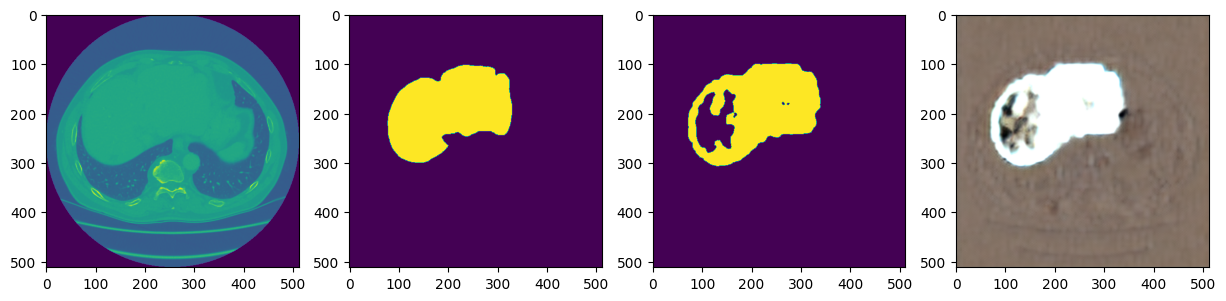

dice:0.5409984871406959 iou:0.37080049771878887 precision:0.37897414158541753 recall:0.945031712473573
global_step: 1500,                         mdice: 0.7778499758450135,                         miou: 0.6923424661751996,                         mAPmask: 0.6841193390758713
slice:302


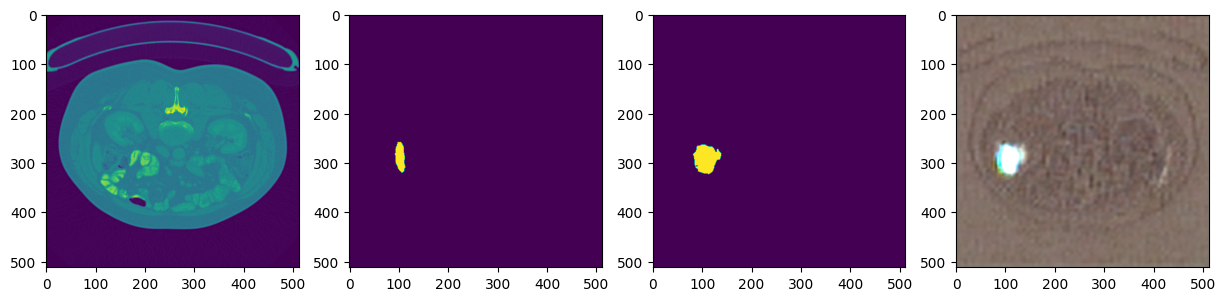

dice:0.925453843182696 iou:0.8612508986340762 precision:0.8650299933348145 recall:0.9949530441448924
global_step: 1600,                         mdice: 0.7796390846177133,                         miou: 0.6943852116982606,                         mAPmask: 0.6861465679209253
slice:53


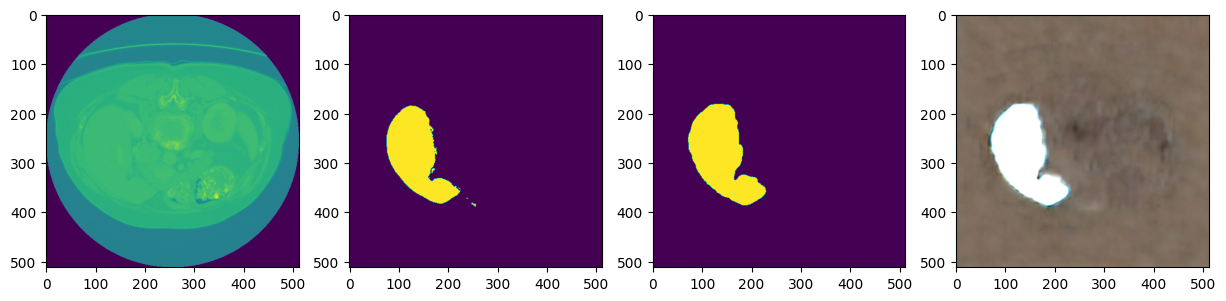

dice:0.0 iou:0.0 precision:0.0 recall:0.0
global_step: 1700,                         mdice: 0.7817258690537189,                         miou: 0.6969468718336445,                         mAPmask: 0.6888219548426295
slice:451


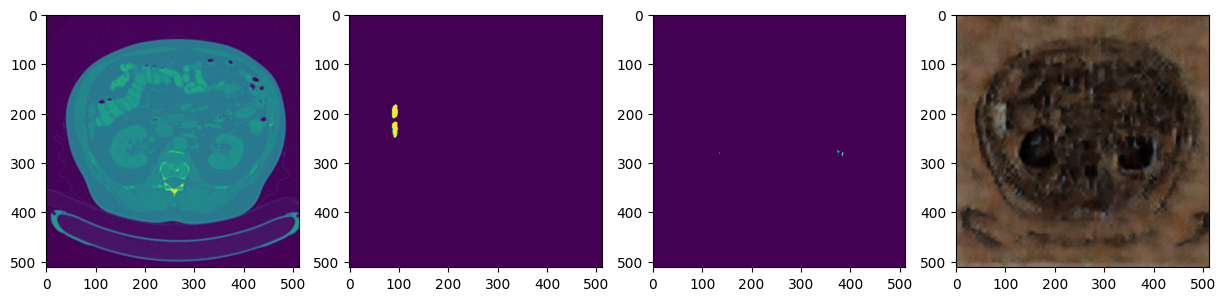

dice:0.88390987308556 iou:0.7919699778450965 precision:0.8271628258405742 recall:0.9490166332556753
global_step: 1800,                         mdice: 0.783022116099993,                         miou: 0.6985429447544877,                         mAPmask: 0.6905114538703029
slice:508


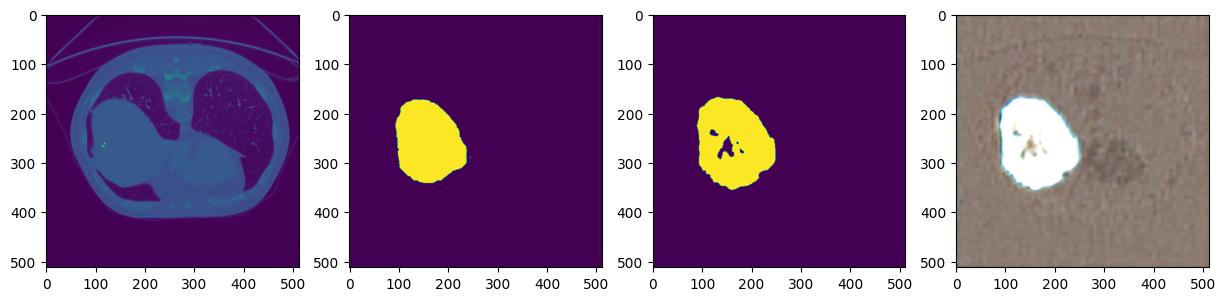

dice:0.1922099915325995 iou:0.1063231850117096 precision:0.5820512820512821 recall:0.11511156186612576
global_step: 1900,                         mdice: 0.7877418609206425,                         miou: 0.7038922150776189,                         mAPmask: 0.6960962787084461
slice:310


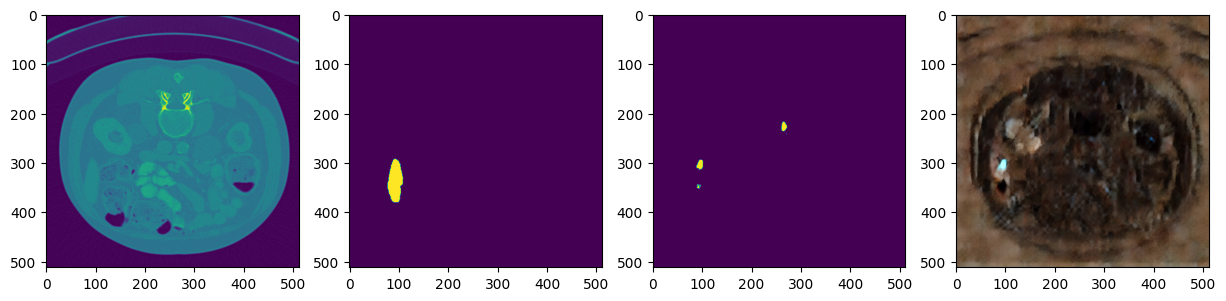

dice:0.8839021937268213 iou:0.7919576481189458 precision:0.7925825724270094 recall:0.9990053992611537
global_step: 2000,                         mdice: 0.7846825134616768,                         miou: 0.7008586573226223,                         mAPmask: 0.6930108474674438
slice:352


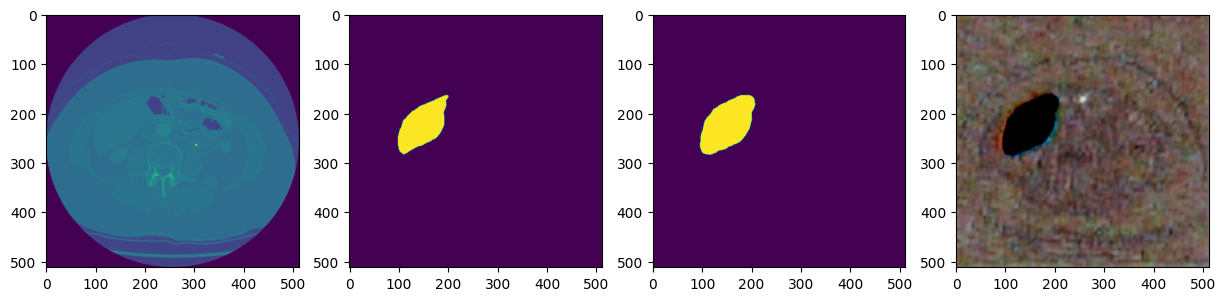

dice:0.878417467574881 iou:0.7831946755407654 precision:0.7864004677971765 recall:0.9948219380746064
global_step: 2100,                         mdice: 0.7804438824001758,                         miou: 0.6968497636893822,                         mAPmask: 0.6888700253202564
slice:400


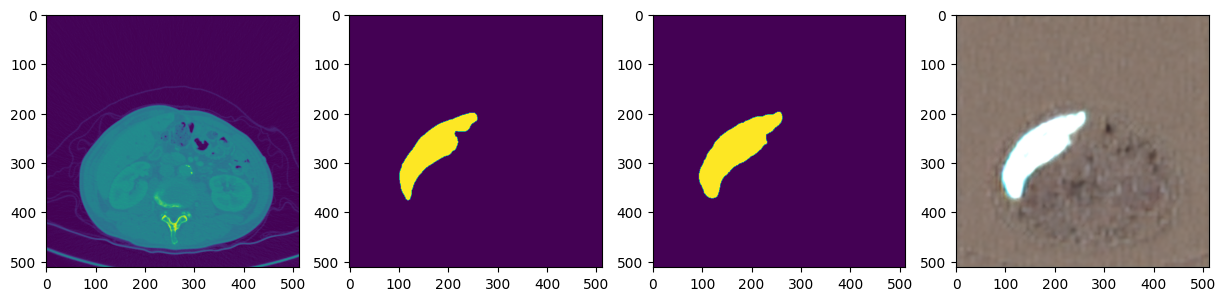

dice:0.939012696099114 iou:0.8850366942626803 precision:0.8851646960986369 recall:0.9998366346742904
global_step: 2200,                         mdice: 0.7798959556820186,                         miou: 0.6960826036277438,                         mAPmask: 0.6879965786864166
slice:387


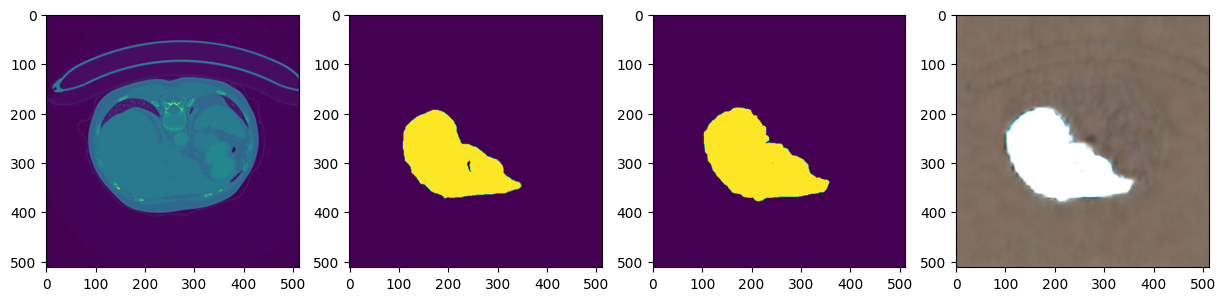

dice:0.8211972522080471 iou:0.6966366966366966 precision:0.6966366966366966 recall:1.0
global_step: 2300,                         mdice: 0.7785991270058581,                         miou: 0.6946285709599396,                         mAPmask: 0.6865670736647587
slice:323


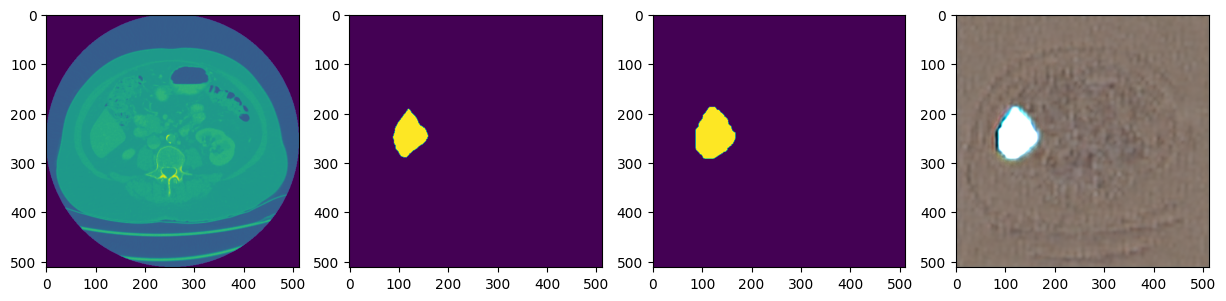


Patient: 100%|██████████| 27/27 [33:12<00:00, 73.80s/it]

mdice: 0.7791059434067265       miou: 0.6947518445849533       map_mask: 0.6866994507715123 total:2363


In [7]:
from importlib import reload
import training_scripts.segmentation_metrics
reload(training_scripts.segmentation_metrics)
from training_scripts.segmentation_metrics import test_medical_segmentation_metrics
from utils.utils import load_pipe_from_path
import numpy as np
prompt = 'segmentation map of liver'
lits_path = '/disk4/Lev/Projects/diffusion_finetuning/data/lits17/test'

lits_scores = test_medical_segmentation_metrics(lits_path, lits_path, pipe, prompt, 0.05, 12,
                                  n_examples_per_ct=100,
                                  max_examples=float('inf'),
                                  print_every=100)
n_examples = len(lits_scores['dice'])
print(f'mdice: {np.mean(lits_scores["dice"])} \
      miou: {np.mean(lits_scores["iou"])} \
      map_mask: {np.mean(lits_scores["ap_mask"])} total:{n_examples}')

In [6]:
import numpy as np
n_examples = len(lits_scores['dice'])
print(f'mdice: {np.mean(lits_scores["dice"])} \
      miou: {np.mean(lits_scores["iou"])} \
      map_mask: {np.mean(lits_scores["ap_mask"])} total:{n_examples}')

mdice: 0.7325508227044643       miou: 0.6188675319031843       map_mask: 0.6094928207611263 total:2363


### Zero Shot Spleen Results

Patient:  93%|█████████▎| 38/41 [13:43<00:45, 15.26s/it]

dice:0.07238307349665925 iou:0.03755054881571346 precision:0.03755054881571346 recall:1.0
global_step: 1000,                         mdice: 0.19265556928831185,                         miou: 0.11106912016137906,                         mAPmask: 0.09708134211815306


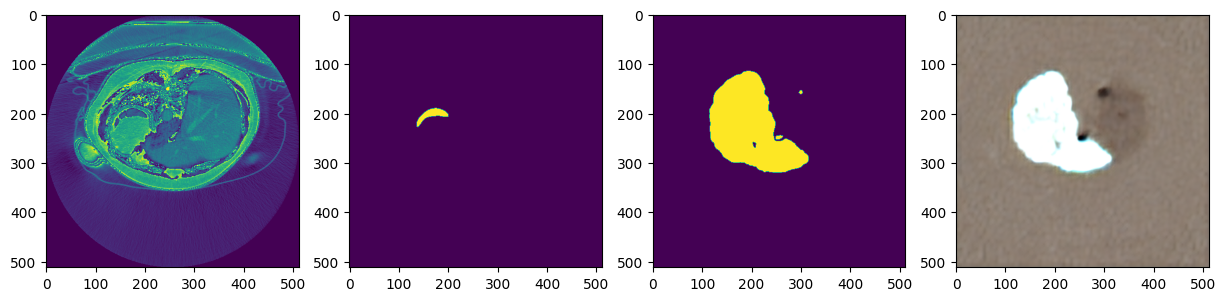

Patient: 100%|██████████| 41/41 [14:35<00:00, 21.35s/it]

mdice: 0.1944846666524367       miou: 0.11226770534171691       map_mask: 0.09847480278736451 total:1051


In [7]:
prompt = 'segmentation map of spleen'

ds_path = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task09_Spleen/'
seg_path = os.path.join(ds_path,'labelsTr')
vol_path = os.path.join(ds_path, 'imagesTr')

zero_spleen_scores = test_medical_segmentation_metrics(seg_path, vol_path, pipe, prompt, 0.05, 12,
                                  n_examples_per_ct=float('inf'),
                                  max_examples=float('inf'),
                                  print_every=100)

n_examples = len(zero_spleen_scores['dice'])
print(f'mdice: {np.mean(zero_spleen_scores["dice"])} \
      miou: {np.mean(zero_spleen_scores["iou"])} \
      map_mask: {np.mean(zero_spleen_scores["ap_mask"])} total:{n_examples}')

### Zero shot Lung Results

In [22]:
%load_ext autoreload
%autoreload 2

In [ ]:
from importlib import reload
from training_scripts.segmentation_metrics import test_medical_segmentation_metrics
reload(training_scripts.segmentation_metrics)
prompt = 'segmentation map of lung'

ds_path = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task06_Lung'
seg_path = os.path.join(ds_path,'labelsTr')
vol_path = os.path.join(ds_path, 'imagesTr')

zero_lung_scores = test_medical_segmentation_metrics(seg_path, vol_path, pipe, prompt, 0.05, 12,
                                  n_examples_per_ct=float('inf'),
                                  max_examples=float('inf'),
                                  print_every=5)

n_examples = len(zero_lung_scores['dice'])
print(f'mdice: {np.mean(zero_lung_scores["dice"])} \
      miou: {np.mean(zero_lung_scores["iou"])} \
      map_mask: {np.mean(zero_lung_scores["ap_mask"])} total:{n_examples}')

### Zero Shot Heart Results

In [ ]:
prompt = 'segmentation map of heart'

ds_path = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task02_Heart'
seg_path = os.path.join(ds_path,'labelsTr')
vol_path = os.path.join(ds_path, 'imagesTr')

zero_heart_scores = test_medical_segmentation_metrics(seg_path, vol_path, pipe, prompt, 0.05, 12,
                                  n_examples_per_ct=float('inf'),
                                  max_examples=float('inf'),
                                  print_every=100)

n_examples = len(zero_heart_scores['dice'])
print(f'mdice: {np.mean(zero_heart_scores["dice"])} \
      miou: {np.mean(zero_heart_scores["iou"])} \
      map_mask: {np.mean(zero_heart_scores["ap_mask"])} total:{n_examples}')

### One shot Spleen Results

In [2]:
from utils.utils import create_pkl_w_good_slices_single_patient

ds_path = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task09_Spleen/'
msd_seg_path = os.path.join(ds_path,'labelsTr')
msd_path = os.path.join(ds_path, 'imagesTr')
pkl_path = os.path.join(ds_path, 'imagesFinetune')
create_pkl_w_good_slices_single_patient(msd_path, msd_seg_path, pkl_path, 12)

spleen_47
{'/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task09_Spleen/labelsTr/spleen_47.nii.gz': [67, 76, 85, 68, 69, 75, 78, 84, 83, 80, 72, 65]} 
 {'/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task09_Spleen/imagesTr/spleen_47.nii.gz': [67, 76, 85, 68, 69, 75, 78, 84, 83, 80, 72, 65]}


In [1]:
from utils.utils import create_pkl_w_good_slices_single_patient
ds_path = '/disk4/Lev/Projects/diffusion_finetuning/data/miccai2015/RawData/Training'
imgs_path = os.path.join(ds_path, 'img')
seg_path = os.path.join(ds_path, 'label')

pkl_path = ds_path
create_pkl_w_good_slices_single_patient(imgs_path, seg_path, pkl_path, 'miccai', 12)



/opt/miniconda3/envs/lev/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-03-07 01:41:21.204255: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 01:41:23.043614: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-07 01:41:23.043654: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries.

label0009
{'/disk4/Lev/Projects/diffusion_finetuning/data/miccai2015/RawData/Training/label/label0009.nii.gz': [56, 125, 35, 77, 134, 47, 41, 104, 124, 112, 105, 99]} 
 {'/disk4/Lev/Projects/diffusion_finetuning/data/miccai2015/RawData/Training/img/img0009.nii.gz': [56, 125, 35, 77, 134, 47, 41, 104, 124, 112, 105, 99]}


In [2]:
%load_ext autoreload
%autoreload 1

In [ ]:
from training_scripts.segmentation_metrics import test_medical_segmentation_metrics
from utils.utils import load_pipe_from_path, replace_unet_in_pipeline
import numpy as np
import sys
import os
import torch
from lora_diffusion.lora import inject_trainable_lora, inject_trainable_lora_on_lora
# os.environ['CUDA_VISIBLE_DEVICES'] = '4,6,7'

prompt = 'segmentation map of spleen'
ds_path = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task09_Spleen/'
msd_seg_path = os.path.join(ds_path,'labelsTr')
msd_path = os.path.join(ds_path, 'imagesTr')


# if using finetuned with more lora:
finetuned_lora_path = '/disk4/Lev/Projects/diffusion_finetuning/output/lits/no_text/one_shot_spleen_w_more_lora_run4/lora_weight.pt'
# finetuned_lora = None
# if youre using finetuned with more lora, the path here should be the pretrained backbone,
# meaning the weights that werent fine tuned on spleen
pipe = load_pipe_from_path('/disk4/Lev/Projects/diffusion_finetuning/output/lits/no_text/mse_seg_pred__prev_noisy_segmapt_latent_new_clip_run3',
                           load_clip_weights=True,
                           path_to_finetuned_lora_lora_weights=finetuned_lora_path,
                           device='cuda:6',
                           original_lora_rank=6,
                           rank_of_finetuned_loras=4)

# TODO load also convout weights
if finetuned_lora_path:
      # get dir path and add "seg_weights.pt"
      seg_weights_path = os.path.join(os.path.dirname(finetuned_lora_path), 'unet_seg_weights.pt')
      chkpt = torch.load(seg_weights_path)['conv_out_state_dict']
      pipe.unet.conv_out.load_state_dict(chkpt)
# inject_trainable_lora_on_lora(pipe.unet)
# chkpt = torch.load('/disk4/Lev/Projects/diffusion_finetuning/output/lits/no_text/one_shot_spleen_w_more_lora_run4/entire_finetuned_unet_weights.pt')['unet_weights']
# pipe.unet.load_state_dict(chkpt)
pipe.to('cuda:6')
print(pipe.unet)

spleen_scores = test_medical_segmentation_metrics(msd_seg_path, msd_path, pipe, prompt, 0.1, 12,
                                  n_examples_per_ct=float('inf'),
                                  max_examples=float('inf'),
                                  print_every=2)
n_examples = len(spleen_scores['dice'])
print(f'mdice: {np.mean(spleen_scores["dice"])} \
      miou: {np.mean(spleen_scores["iou"])} \
      map_mask: {np.mean(spleen_scores["ap_mask"])} total:{n_examples}')

In [1]:
%reload_ext autoreloadb
%autoreload 2

In [1]:
os.environ["CUDA_VISIBLE_DEVICES"] = "2,3,4"  # replace with the indices of the GPUs you want to use

/opt/miniconda3/envs/lev/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-03-07 11:33:33.953720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 11:33:35.427125: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-07 11:33:35.427186: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries.

dice:0.045700803914715135 iou:0.02338475296221775 precision:0.023730659285811515 recall:0.6160188457008245
global_step: 0,                         mdice: 0.045700803914715135,                         miou: 0.02338475296221775,                         mAPmask: 0.014618533340965162
slice:82


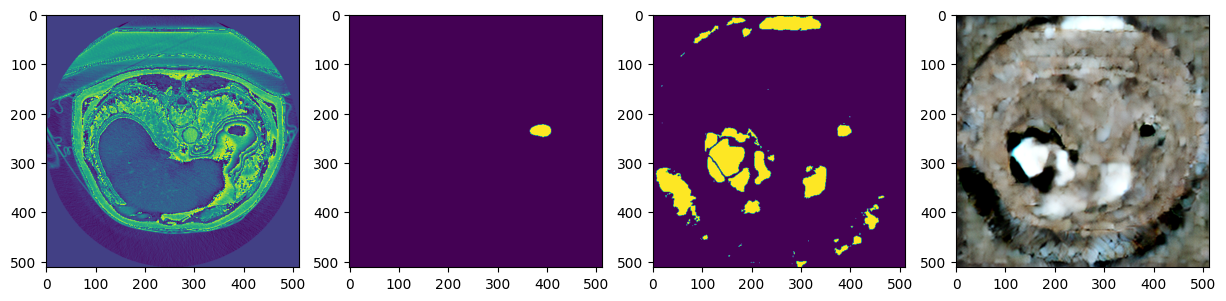

Patient:  10%|█         | 3/30 [01:11<11:31, 25.61s/it]

dice:0.0 iou:0.0 precision:0.0 recall:0.0
global_step: 100,                         mdice: 0.10781815995749533,                         miou: 0.06283202773196053,                         mAPmask: 0.04313086525325192
slice:121


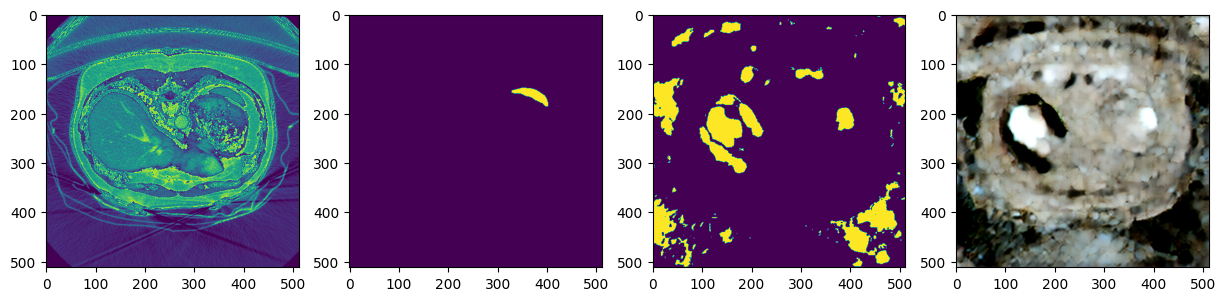

Patient:  13%|█▎        | 4/30 [01:37<11:02, 25.50s/it]

KeyboardInterrupt: 

In [2]:
from training_scripts.segmentation_metrics import test_medical_segmentation_metrics
from utils.utils import load_pipe_from_path, replace_unet_in_pipeline
import numpy as np
import sys
import os
import torch
from lora_diffusion.lora import inject_trainable_lora, inject_trainable_lora_on_lora

# set visible gpus
pipe = load_pipe_from_path('/disk4/Lev/Projects/diffusion_finetuning/output/miccai/no_text/mse_lora_rank6_finetuning_12_examples_spleen_run1',
                           load_clip_weights=True,
                           path_to_finetuned_lora_lora_weights=None,
                           original_lora_rank=6,
                           device='cuda')
# pipe = load_pipe_from_path(None)

# TODO load also convout weights
# inject_trainable_lora(pipe.unet, r=6)
# inject_trainable_lora_on_lora(pipe.unet, r=3)

chkpt = torch.load('/disk4/Lev/Projects/diffusion_finetuning/output/miccai/no_text/mse_lora_rank6_finetuning_12_examples_spleen_run1/entire_finetuned_unet_weights.pt')['unet_weights']
# print(chkpt.keys())
pipe.unet.load_state_dict(chkpt)
# pipe.to('cuda:0')

prompt = 'segmentation map of spleen'
ds_path = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task09_Spleen/'
msd_seg_path = os.path.join(ds_path,'labelsTs')
msd_path = os.path.join(ds_path, 'imagesTs')
spleen_scores = test_medical_segmentation_metrics('/disk4/Lev/Projects/diffusion_finetuning/data/miccai2015/RawData/Training/label',
                                                  '/disk4/Lev/Projects/diffusion_finetuning/data/miccai2015/RawData/Training/img',
                                                pipe, prompt, 0.05, 12,
                                                dataset='miccai',
                                                n_examples_per_ct=float('inf'),
                                                max_examples=float('inf'),
                                                print_every=100)
n_examples = len(spleen_scores['dice'])
print(f'mdice: {np.mean(spleen_scores["dice"])} \
      miou: {np.mean(spleen_scores["iou"])} \
      map_mask: {np.mean(spleen_scores["ap_mask"])} total:{n_examples}')

In [5]:
import torch
spleen_seg_dict = load_from_pickle('/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task09_Spleen/imagesFinetune/seg_dict_100_examples.pkl')
# print(spleen_seg_dict.keys())
c = 0
for key, item in spleen_seg_dict.items():
    c += len(item)
print(c)

107


In [ ]:
import torch
chkpt = torch.load('/disk4/Lev/Projects/diffusion_finetuning/output/lits/no_text/one_shot_spleen_w_more_lora_run4/entire_finetuned_unet_weights.pt')
print(chkpt['unet_weights'].keys())

In [15]:
chkpt = load_from_pickle('/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task09_Spleen/imagesFinetune/spleen_12_seg_dict.pkl')
print(chkpt)

{'/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task09_Spleen/labelsTr/spleen_12.nii.gz': [100]}


### One shot Lung Results

In [ ]:
# Segmenting cancer cells in a lung
prompt = 'segmentation map of lung'

ds_path = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task06_Lung'
seg_path = os.path.join(ds_path,'labelsTr')
vol_path = os.path.join(ds_path, 'imagesTr')

pipe = load_pipe_from_path('/disk4/Lev/Projects/diffusion_finetuning/output/lits/no_text/oneshot_lungs_run1',
                           load_clip_weights=True,)
pipe.to('cuda:3')

lung_scores = test_medical_segmentation_metrics(seg_path, vol_path, pipe, prompt, 0.05, 12,
                                  n_examples_per_ct=float('inf'),
                                  max_examples=float('inf'),
                                  print_every=100)

n_examples = len(lung_scores['dice'])
print(f'mdice: {np.mean(lung_scores["dice"])} \
      miou: {np.mean(lung_scores["iou"])} \
      map_mask: {np.mean(lung_scores["ap_mask"])} total:{n_examples}')

### One Shot Heart Results

In [ ]:
import numpy as np
from utils.utils import load_pipe_from_path
prompt = 'segmentation map of heart'

ds_path = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task02_Heart'
seg_path = os.path.join(ds_path,'labelsTr')
vol_path = os.path.join(ds_path, 'imagesTr')

pipe = load_pipe_from_path('/disk4/Lev/Projects/diffusion_finetuning/output/lits/no_text/oneshot_heart_run1',
                           load_clip_weights=True,)
pipe.to('cuda:3')

heart_scores = test_medical_segmentation_metrics(seg_path, vol_path, pipe, prompt, 0.05, 12,
                                  n_examples_per_ct=float('inf'),
                                  max_examples=float('inf'),
                                  print_every=100)

n_examples = len(heart_scores['dice'])
print(f'mdice: {np.mean(heart_scores["dice"])} \
      miou: {np.mean(heart_scores["iou"])} \
      map_mask: {np.mean(heart_scores["ap_mask"])} total:{n_examples}')

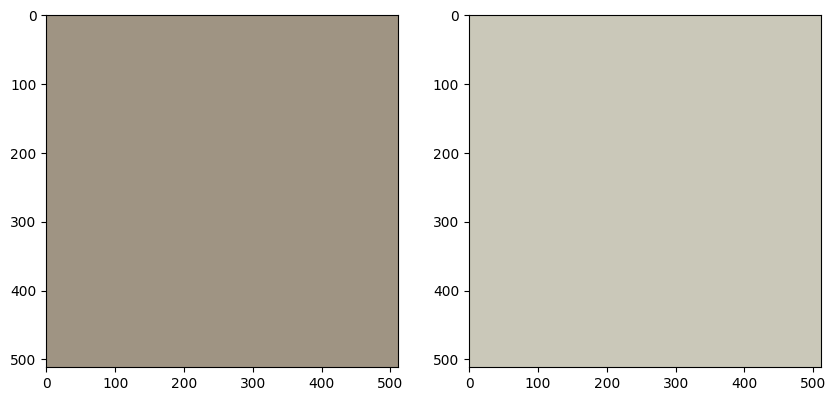

In [155]:
# create image with color (134, 118, 100)
img1 = Image.new('RGB', (512, 512), color = (159, 148, 131))
img2 = Image.new('RGB', (512, 512), color = (202, 200, 185))

# plot img1 and img2 side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img1)
ax[1].imshow(img2)
plt.show()

In [ ]:
import os
import fnmatch
import pickle

def list_files(directory, substring):
    files = []
    for root, dir, filenames in os.walk(directory):
        for filename in fnmatch.filter(filenames, substring + '*'):
            files.append(os.path.join(root, filename))
    return files

path = '/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task06_Lung/labelsTr'
seg_files = list_files(, 'lung')
# print(len(seg_files), '\n', len(vol_files))

seg_files_w_good_slices = {}
for path in seg_files:
    img = sitk.ReadImage(path)
    img_arr = sitk.GetArrayFromImage(img)
    good_slices = get_good_slices(img_arr)
    seg_files_w_good_slices[path] = good_slices

### Dataset Testing

In [6]:
ct_path = '/disk4/Lev/Projects/diffusion_finetuning/data/lits17/train/volume-102.nii'
seg_path = '/disk4/Lev/Projects/diffusion_finetuning/data/lits17/train/segmentation-102.nii'

ct = sitk.ReadImage(ct_path, sitk.sitkUInt8)
seg = sitk.ReadImage(seg_path, sitk.sitkUInt8)

ct_array = sitk.GetArrayFromImage(ct)
seg_array = sitk.GetArrayFromImage(seg)

In [37]:
seg_img = Image.fromarray(seg_array*127)
ct_img = Image.fromarray(ct_array)

In [ ]:
good_slices = get_good_slices(seg_array)
good_slices

In [56]:
def convert_tensor_to_img(tensor, normalized=False):
    if normalized:
        arr = np.array(tensor*255, dtype=np.uint8)
    else:
        arr = np.array(tensor, dtype=np.uint8)
    print(arr.shape)
    arr = np.moveaxis(arr, [0, 1, 2], [2, 0, 1])
    print(arr.shape)
    if arr.shape[2] == 1:
        arr = arr.squeeze(2)
    img = Image.fromarray(arr)
    return img 

In [9]:
import training_scripts.LITS17Dataset
from importlib import reload
reload(training_scripts.LITS17Dataset)
from training_scripts.LITS17Dataset import LITS17Dataset

ds = LITS17Dataset(
    "/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task09_Spleen/imagesTr",
    "/disk4/Lev/Projects/diffusion_finetuning/data/MSD/Task09_Spleen/labelsTr",
    "segmentation map of spleen",
    organ="spleen",
    tokenizer=None,
    size=512,
    path_slices_for_segmap="/disk4/Lev/Projects/diffusion_finetuning/data/miccai2015/RawData/Training/seg_dict_12_examples.pkl",
    path_slices_for_vol="/disk4/Lev/Projects/diffusion_finetuning/data/miccai2015/RawData/Training/vol_dict_12_examples.pkl",
    resize=True,
    center_crop=True,
    h_flip=True,
    color_jitter=True,
    rand_rotate=True
)

center crop


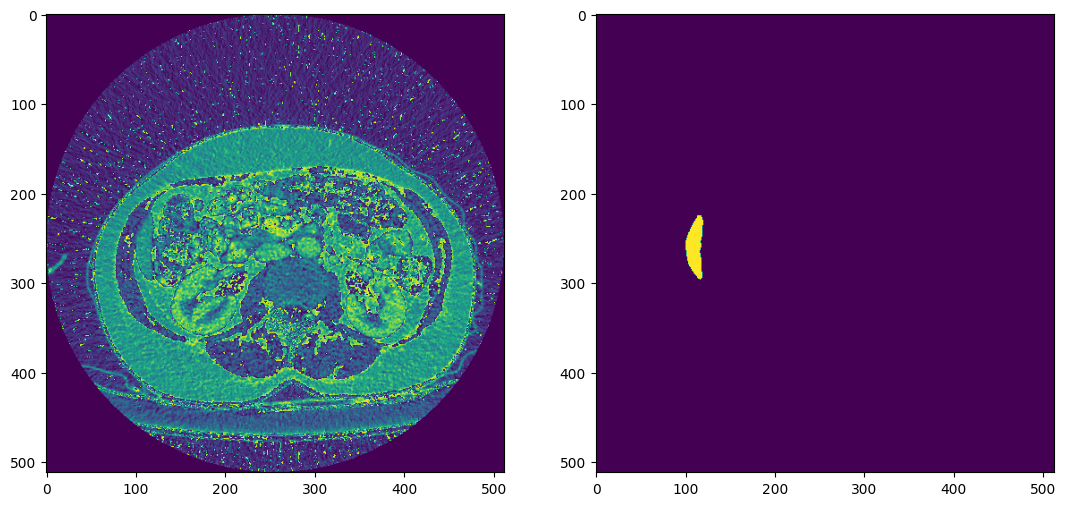

In [11]:
import SimpleITK as sitk

ct_path = '/disk4/Lev/Projects/diffusion_finetuning/data/lits17/train/volume-110.nii'
seg_path = '/disk4/Lev/Projects/diffusion_finetuning/data/lits17/train/segmentation-110.nii'

ct = sitk.ReadImage(ct_path, sitk.sitkUInt8)
seg = sitk.ReadImage(seg_path, sitk.sitkUInt8)

ct_array = sitk.GetArrayFromImage(ct)
seg_array = sitk.GetArrayFromImage(seg)

ct_img = ct_array[355]
seg_img = seg_array[355]

plot_2_imgs_side_by_side(ct_img, seg_img)

12
[('/disk4/Lev/Projects/diffusion_finetuning/data/miccai2015/RawData/Training/img/img0009.nii.gz', 56), ('/disk4/Lev/Projects/diffusion_finetuning/data/miccai2015/RawData/Training/img/img0009.nii.gz', 125), ('/disk4/Lev/Projects/diffusion_finetuning/data/miccai2015/RawData/Training/img/img0009.nii.gz', 35), ('/disk4/Lev/Projects/diffusion_finetuning/data/miccai2015/RawData/Training/img/img0009.nii.gz', 77), ('/disk4/Lev/Projects/diffusion_finetuning/data/miccai2015/RawData/Training/img/img0009.nii.gz', 134), ('/disk4/Lev/Projects/diffusion_finetuning/data/miccai2015/RawData/Training/img/img0009.nii.gz', 47), ('/disk4/Lev/Projects/diffusion_finetuning/data/miccai2015/RawData/Training/img/img0009.nii.gz', 41), ('/disk4/Lev/Projects/diffusion_finetuning/data/miccai2015/RawData/Training/img/img0009.nii.gz', 104), ('/disk4/Lev/Projects/diffusion_finetuning/data/miccai2015/RawData/Training/img/img0009.nii.gz', 124), ('/disk4/Lev/Projects/diffusion_finetuning/data/miccai2015/RawData/Trainin

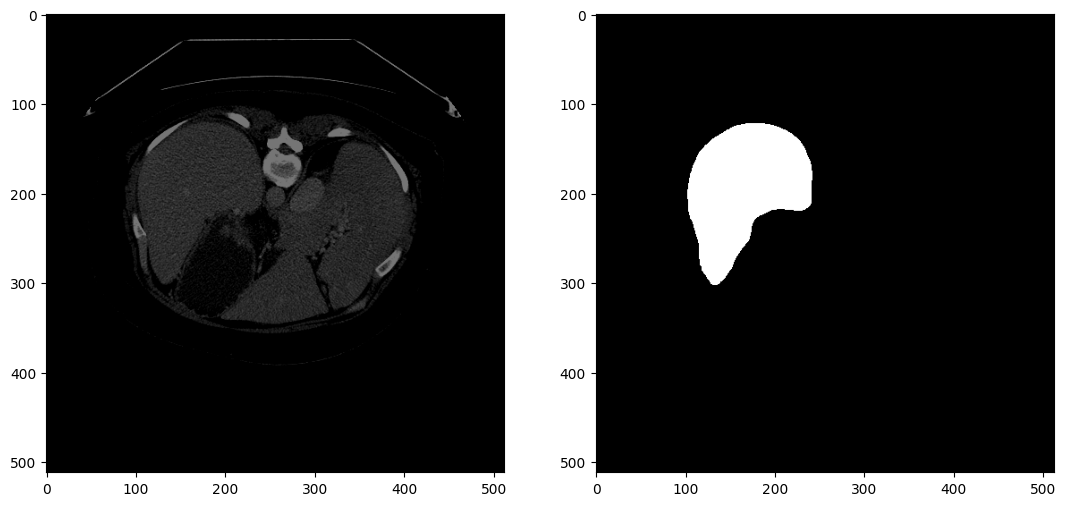

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
print(ds.__len__())
print(ds.ct_list_w_slices)
example = ds[11]
# for ct, seg in zip(ds.ct_list_w_slices, ds.seg_list_w_slices):
#     print(f'ct: {ct}\n seg: {seg}\n\n')
    
tensor_img = example['instance_image']
tensor_seg = example['instance_segmap_image']
seg_img = tensor_to_pil(tensor_seg, normalized=False)
ct_img = tensor_to_pil(tensor_img, normalized=True)

plot_2_imgs_side_by_side(ct_img, seg_img)

In [3]:
import torch

def tensor_to_pil(tensor, normalized=False):
    if normalized:
        tensor = torch.clamp(tensor, 0,255) * 128
        tensor.to(dtype=torch.uint8)
    np_arr = tensor.numpy().astype(np.uint8)
    np_arr = np_arr.transpose(1, 2, 0)
    print(np_arr.dtype)
    return Image.fromarray(np_arr)

In [19]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
from utils.utils import get_good_slices, get_good_slices_by_class
ct_path = '/disk4/Lev/Projects/diffusion_finetuning/data/miccai2015/RawData/Training/img/img0009.nii.gz'
seg_path = '/disk4/Lev/Projects/diffusion_finetuning/data/miccai2015/RawData/Training/label/label0009.nii.gz'

ct_img = sitk.ReadImage(ct_path)
ct_arr = sitk.GetArrayFromImage(ct_img)
print(ct_arr.shape)

seg_img = sitk.ReadImage(seg_path)
seg_arr = sitk.GetArrayFromImage(seg_img)
print(seg_arr.shape)
good_slices = get_good_slices_by_class(seg_arr)
print(good_slices)

(149, 512, 512)
(149, 512, 512)
[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]


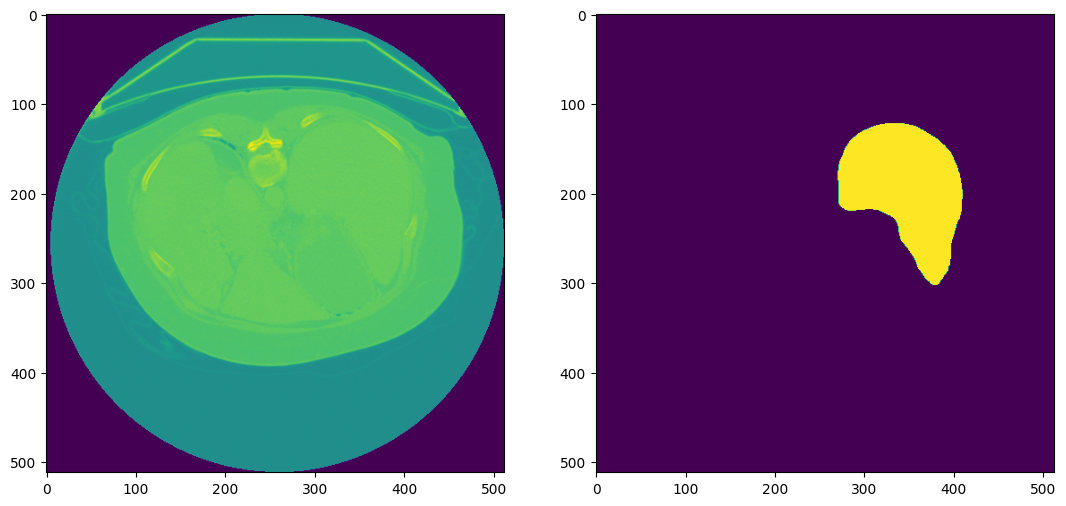

In [21]:
slice_n = 99
ct_img = ct_arr[slice_n]
seg_img = seg_arr[slice_n]
seg_img[seg_img != 1] = 0

plot_2_imgs_side_by_side(ct_img, seg_img)


In [4]:
import matplotlib.pyplot as plt
def plot_2_imgs_side_by_side(img1, img2):
    fig, ax = plt.subplots(1, 2, figsize=(13,13))
    ax[0].imshow(img1)
    ax[1].imshow(img2)
    plt.show()